In [1]:
import warnings, math, random
import numpy as np
import pandas as pd
from collections import Counter
from sklearn import preprocessing, cross_validation, neighbors

import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

%matplotlib inline

In [2]:
df = pd.read_csv('breast-cancer-wisconsin.data')
df.replace('?', -99999, inplace=True)
df.drop(['id'], 1, inplace=True)

In [3]:
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)

In [4]:
example_measures = np.array([[4,2,1,1,1,2,3,2,1],[4,2,1,2,2,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures),-1)

prediction = clf.predict(example_measures)
print(prediction)

[2 2]


## K-Neighbor algorithm from scratch

In [5]:
dataset = {'b':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]

In [23]:
def k_nearest_neighbor(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
    distances = []
    
    for group in data:
        for features in data[group]:
            #euclidean_distance = np.sqrt(np.sum((np.array(features)-np.array(predict))**2))
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance, group])
    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / k
    
    return vote_result, confidence

In [24]:
result, confidence = k_nearest_neighbor(dataset, new_features, 3)
print(result, confidence)

r 1.0


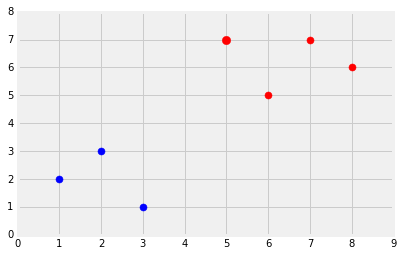

In [25]:
[[plt.scatter(ii[0], ii[1], s=50, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], s=70, color=result)
plt.show()

In [22]:
full_data = df.astype(float).values.tolist()

random.shuffle(full_data)

test_size = 0.2
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

for i in train_data:
    train_set[i[-1]].append(i[:-1]) 

for i in test_data:
    test_set[i[-1]].append(i[:-1])

correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote, confidence = k_nearest_neighbor(train_set, data, k=5)
        if group == vote:
            correct += 1
        else:
            print(confidence)
        total +=1

print('Accuracy: ', correct/float(total))


Accuracy:  0.9712230215827338
